# Compactação via PCA

Número de linhas: 1176
Número de colunas: 1920
Número de canais: 3


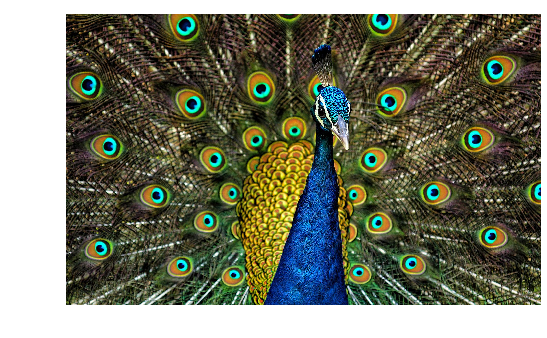

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

import common as com
import pca

import sklearn.datasets as datasets
from sklearn.datasets import fetch_openml

np.random.seed(12345)

img = imread('data/peacock.png')

print("Número de linhas: %d" % img.shape[0])
print("Número de colunas: %d" % img.shape[1])
print("Número de canais: %d" % img.shape[2])

fig = plt.figure(figsize=com.figsize)
plt.axis('off')
plt.imshow(img)

Número de atributos: 5760


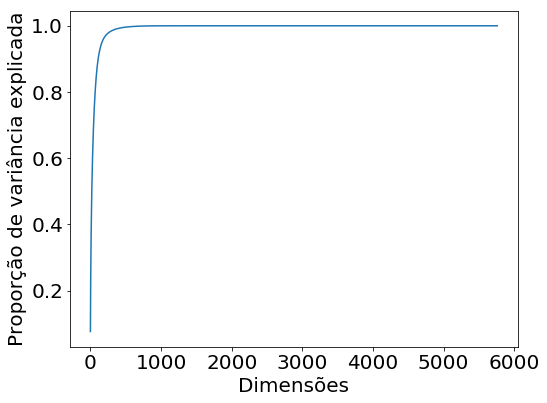

In [6]:
x = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
print("Número de atributos: %d" % x.shape[1])

pca_result = pca.compute(x)

explained_variance = np.cumsum(np.sort(pca_result['eigen_values'])[::-1])
fig = plt.figure(figsize=com.figsize)
plt.rcParams.update({'font.size': com.fontsize})
plt.plot(explained_variance/explained_variance[-1])
plt.xlabel("Dimensões")
plt.ylabel("Proporção de variância explicada")
plt.savefig('figs/pca_img.png', dpi=com.dpi)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


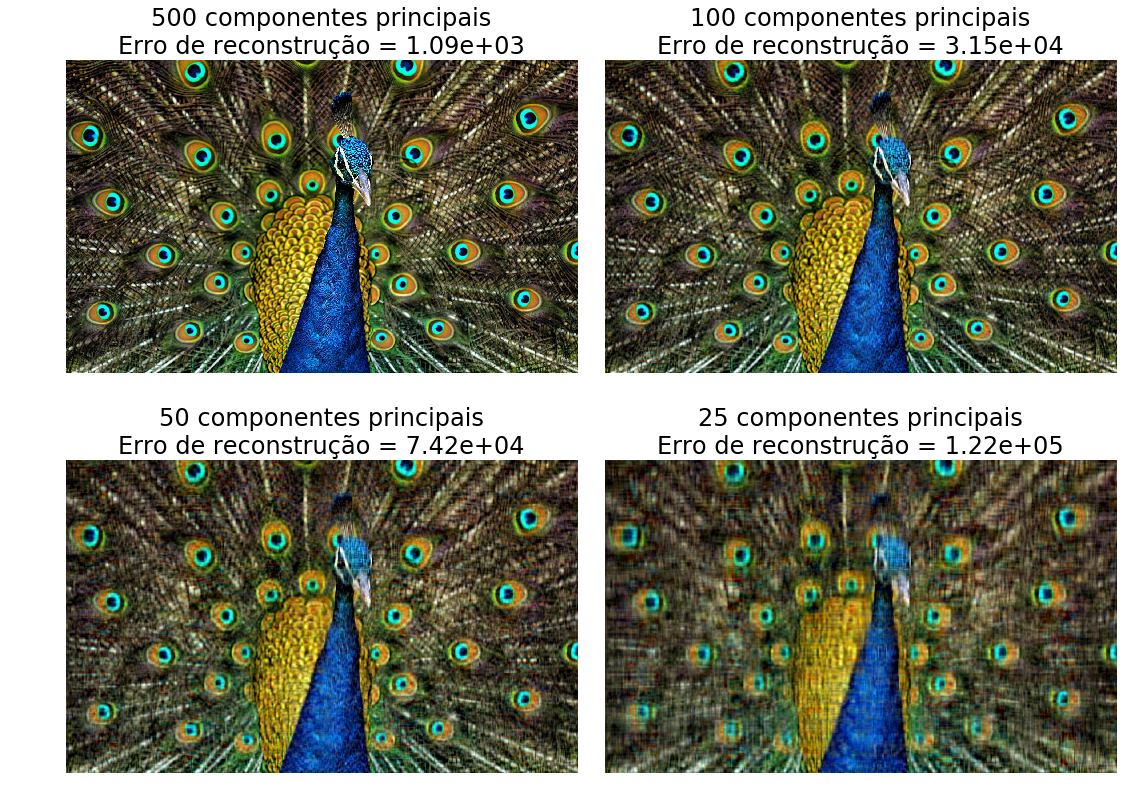

In [7]:
#NC_range = [500, 100, 50, 25]
NC_range = [500, 100, 50, 25]

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,12))

for i, K in enumerate(NC_range):
    
    x_transformed = pca.transform(x, pca_result, dim=K)
    x_reconstructed = pca.inverse_transform(x_transformed, pca_result)
    
    img_reconstructed = x_reconstructed.copy().reshape(img.shape)
    
    error = pca.compute_reconstruction_error(x, x_reconstructed)

    axs.flatten()[i].axis('off')
    axs.flatten()[i].imshow(img_reconstructed)
    
    axs.flatten()[i].set_title(f"{K} componentes principais\nErro de reconstrução = {error:.2e}")
        
plt.savefig('figs/pca_img_compact.png', dpi=com.dpi)